In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine=engine, reflect=True)

In [40]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [42]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_12_mos = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).order_by(measurement.date).all()

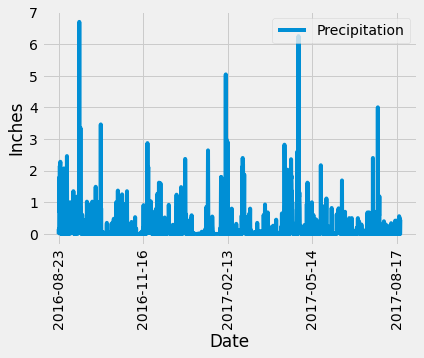

In [45]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12_mos, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df = df.sort_values(by='Date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc="upper right")
plt.show()

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
     
prcp_mean = df["Precipitation"].mean()
prcp_med = df["Precipitation"].median()
prcp_var = df["Precipitation"].var()
prcp_std = df["Precipitation"].std()
prcp_sem = df["Precipitation"].sem()
      
print(f'Mean: {round(prcp_mean, 2)}')
print(f'Median: {round(prcp_med, 2)}')
print(f'Variance: {round(prcp_var, 2)}')
print(f'Std. Dev.: {round(prcp_std, 2)}')
print(f'Std. Err.: {round(prcp_sem, 2)}')

Mean: 0.18
Median: 0.02
Variance: 0.21
Std. Dev.: 0.46
Std. Err.: 0.01


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station).group_by(station.id).count()
print(f'Station Count: {station_count}')

Station Count: 9


In [50]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
activity_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [58]:
most_active_station = session.query(measurement.station).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
most_active_station = most_active_station[0]
print(most_active_station)

USC00519281


In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_tobs = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station).all()
print("Lowest Temp: ", low_tobs[0])
high_tobs = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station).all()
print("Highest Temp: ", high_tobs[0])
avg_tobs = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()
print("Average Temp: ", avg_tobs[0])

Lowest Temp:  (54.0,)
Highest Temp:  (85.0,)
Average Temp:  (71.66378066378067,)


In [68]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_last_12 = session.query(measurement.date, measurement.tobs).filter(measurement.date >= one_year).filter(measurement.station == most_active_station).order_by(measurement.tobs).all()

Text(0.5, 0, 'Temperature')

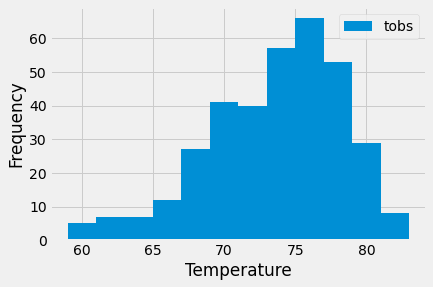

In [65]:
df_2 = pd.DataFrame(most_active_last_12)
df_2.plot.hist(bins=12)
plt.xlabel("Temperature")

In [66]:
# Close Session
session.close()